# Explore here

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [47]:
df.to_csv("../data/raw/total_data.csv", index = False)

In [48]:
df.shape

(48895, 16)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [50]:
#Cuales son los duplicados
duplicates = df.duplicated()

In [51]:
df.duplicated(subset='id').sum()

np.int64(0)

In [52]:

df.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True, errors='ignore')
df.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [53]:
print(df.select_dtypes(include=['object', 'category']))

      neighbourhood_group       neighbourhood        room_type
0                Brooklyn          Kensington     Private room
1               Manhattan             Midtown  Entire home/apt
2               Manhattan              Harlem     Private room
3                Brooklyn        Clinton Hill  Entire home/apt
4               Manhattan         East Harlem  Entire home/apt
...                   ...                 ...              ...
48890            Brooklyn  Bedford-Stuyvesant     Private room
48891            Brooklyn            Bushwick     Private room
48892           Manhattan              Harlem  Entire home/apt
48893           Manhattan      Hell's Kitchen      Shared room
48894           Manhattan      Hell's Kitchen     Private room

[48895 rows x 3 columns]


In [54]:
print(df.dtypes)

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [56]:
df.minimum_nights.value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
275        1
182        1
114        1
85         1
36         1
Name: count, Length: 109, dtype: int64

In [57]:
df.price.value_counts()

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
1080       1
1299       1
1295       1
519        1
1978       1
Name: count, Length: 674, dtype: int64

In [58]:
df.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [59]:
df.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [60]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

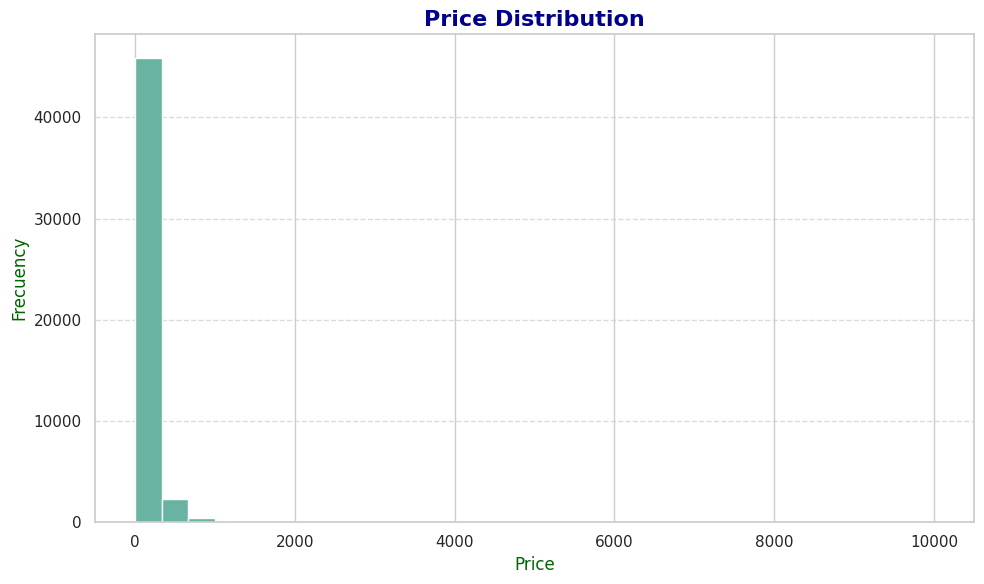

In [61]:

plt.figure(figsize=(10, 6))
df['price'].hist(bins=30, edgecolor='white', color='#69b3a2')
plt.title('Price Distribution', fontsize=16, color='darkblue', fontweight='bold')
plt.xlabel('Price', fontsize=12, color='darkgreen')
plt.ylabel('Frecuency', fontsize=12, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

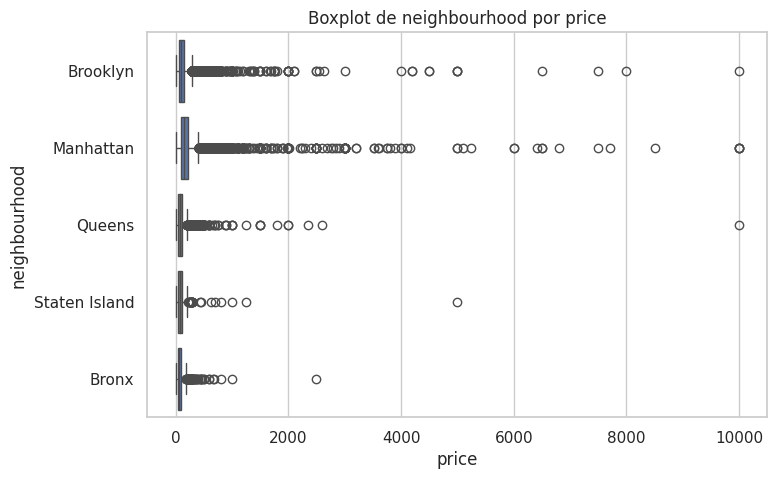

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         45.000000  
75%            24.000000                        2.000000        227.000000  
max           629.000000                      327.000000        365.000000

In [62]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='price', y='neighbourhood_group', data=df)

plt.title('Boxplot de neighbourhood por price')
plt.xlabel('price')
plt.ylabel('neighbourhood')
plt.show()
df.describe()

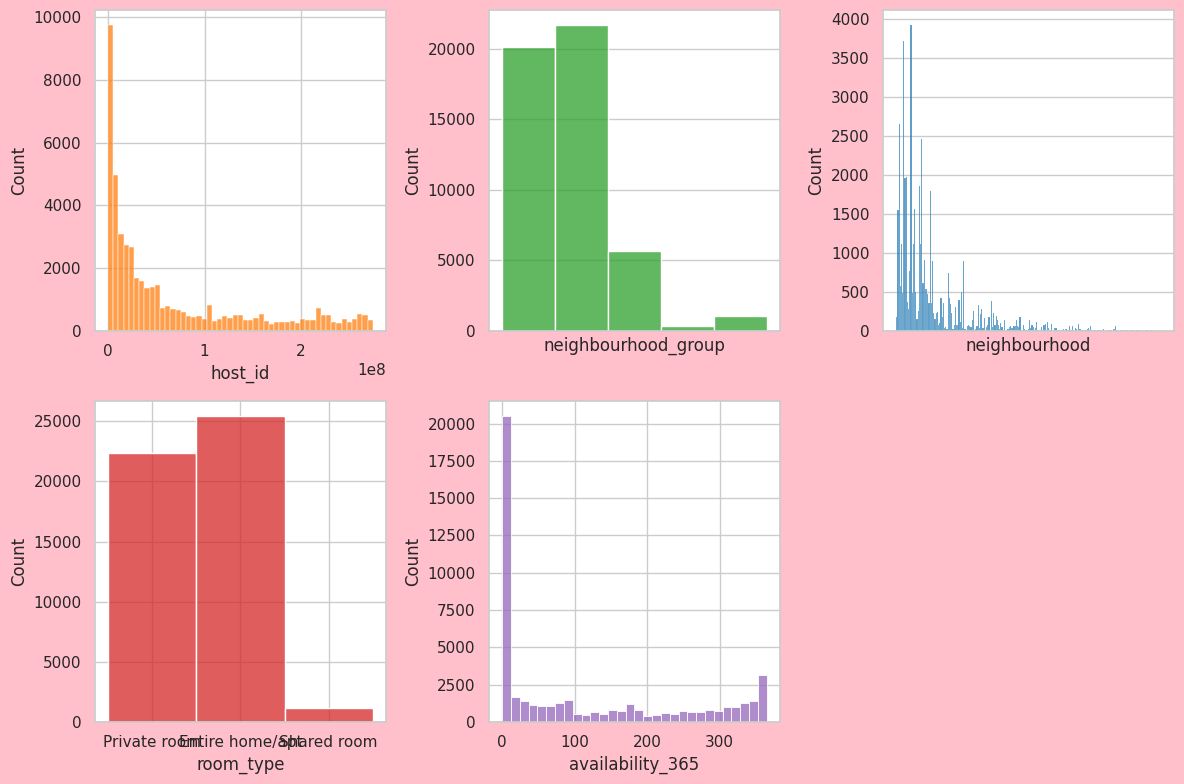

In [63]:


sns.set(style="whitegrid")  

fig, axis = plt.subplots(2, 3, figsize=(12, 8))

fig.patch.set_facecolor('pink')

colores = ['#FF7F0E', '#2CA02C', '#1F77B4', '#D62728', '#9467BD']

sns.histplot(ax=axis[0, 0], data=df, x="host_id", color=colores[0])
sns.histplot(ax=axis[0, 1], data=df, x="neighbourhood_group", color=colores[1]).set_xticks([])
sns.histplot(ax=axis[0, 2], data=df, x="neighbourhood", color=colores[2]).set_xticks([])
sns.histplot(ax=axis[1, 0], data=df, x="room_type", color=colores[3])
sns.histplot(ax=axis[1, 1], data=df, x="availability_365", color=colores[4])

fig.delaxes(axis[1, 2])

plt.tight_layout()

plt.show()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


: 

Numeric Variables analysis

In [ ]:

fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

colors = sns.color_palette("muted", 8)

fig.patch.set_facecolor('lightblue')

axis[0, 0].set_facecolor('lavenderblush')
axis[1, 0].set_facecolor('lavender')
axis[0, 1].set_facecolor('mintcream')
axis[1, 1].set_facecolor('mistyrose')
axis[2, 0].set_facecolor('lightcyan')
axis[3, 0].set_facecolor('honeydew')
axis[2, 1].set_facecolor('aliceblue')
axis[3, 1].set_facecolor('lavender')

sns.histplot(ax=axis[0, 0], data=df, x="price", color=colors[0])
sns.boxplot(ax=axis[1, 0], data=df, x="price", color=colors[1])

sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", color=colors[2]).set_xlim(0, 200)
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights", color=colors[3])

sns.histplot(ax=axis[2, 0], data=df, x="number_of_reviews", color=colors[4])
sns.boxplot(ax=axis[3, 0], data=df, x="number_of_reviews", color=colors[5])

sns.histplot(ax=axis[2, 1], data=df, x="calculated_host_listings_count", color=colors[6])
sns.boxplot(ax=axis[3, 1], data=df, x="calculated_host_listings_count", color=colors[7])

plt.tight_layout()

plt.show()

<Axes: xlabel='calculated_host_listings_count', ylabel='price'>

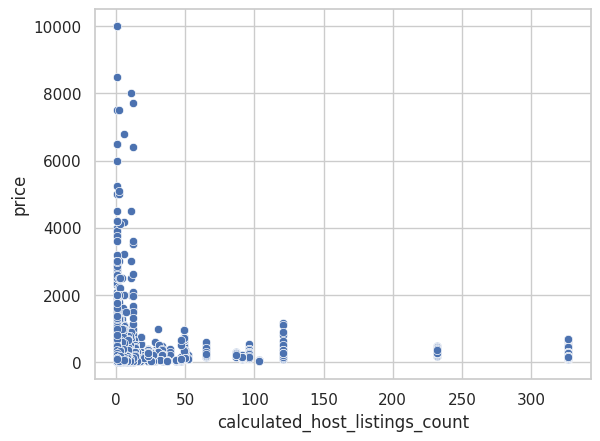

In [ ]:
sns.scatterplot(data=df, x='calculated_host_listings_count', y='price')

<Axes: xlabel='number_of_reviews', ylabel='price'>

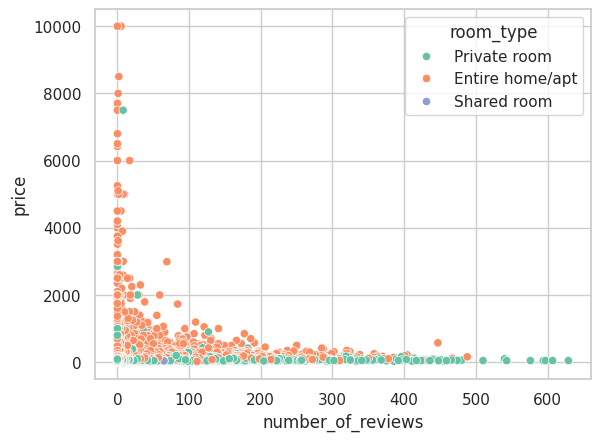

In [ ]:
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type', palette='Set2')


<Axes: xlabel='availability_365', ylabel='price'>

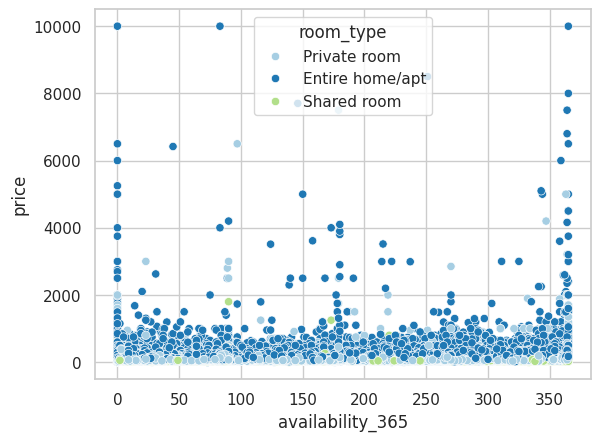

In [ ]:
sns.scatterplot(data=df, x='availability_365', y='price', hue='room_type', palette='Paired')


<Axes: xlabel='latitude', ylabel='price'>

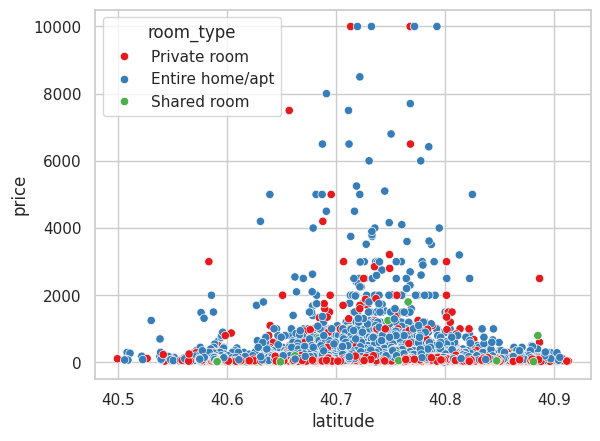

In [ ]:
sns.scatterplot(data=df, x='latitude', y='price', hue='room_type', palette='Set1')


<Axes: xlabel='longitude', ylabel='price'>

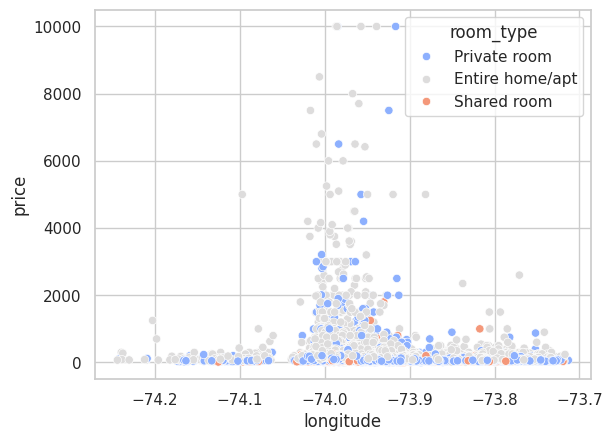

In [ ]:
sns.scatterplot(data=df, x='longitude', y='price', hue='room_type', palette='coolwarm')


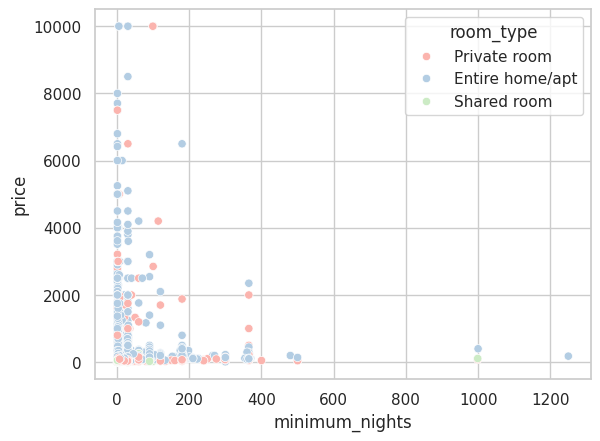

In [ ]:
sns.scatterplot(data=df, x='minimum_nights', y='price', hue='room_type', palette='Pastel1')

plt.show()

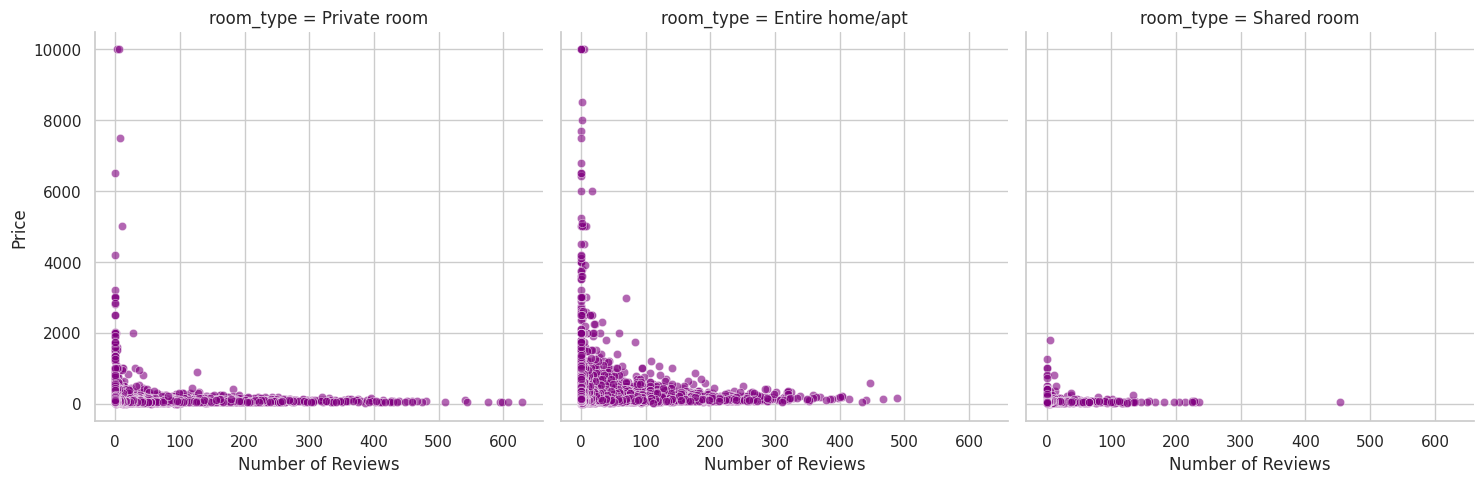

In [ ]:
g = sns.FacetGrid(df, col="room_type", height=5, col_wrap=3)

g.map(sns.scatterplot, 'number_of_reviews', 'price', alpha=0.6, color='purple')

g.set_axis_labels('Number of Reviews', 'Price')

plt.show()

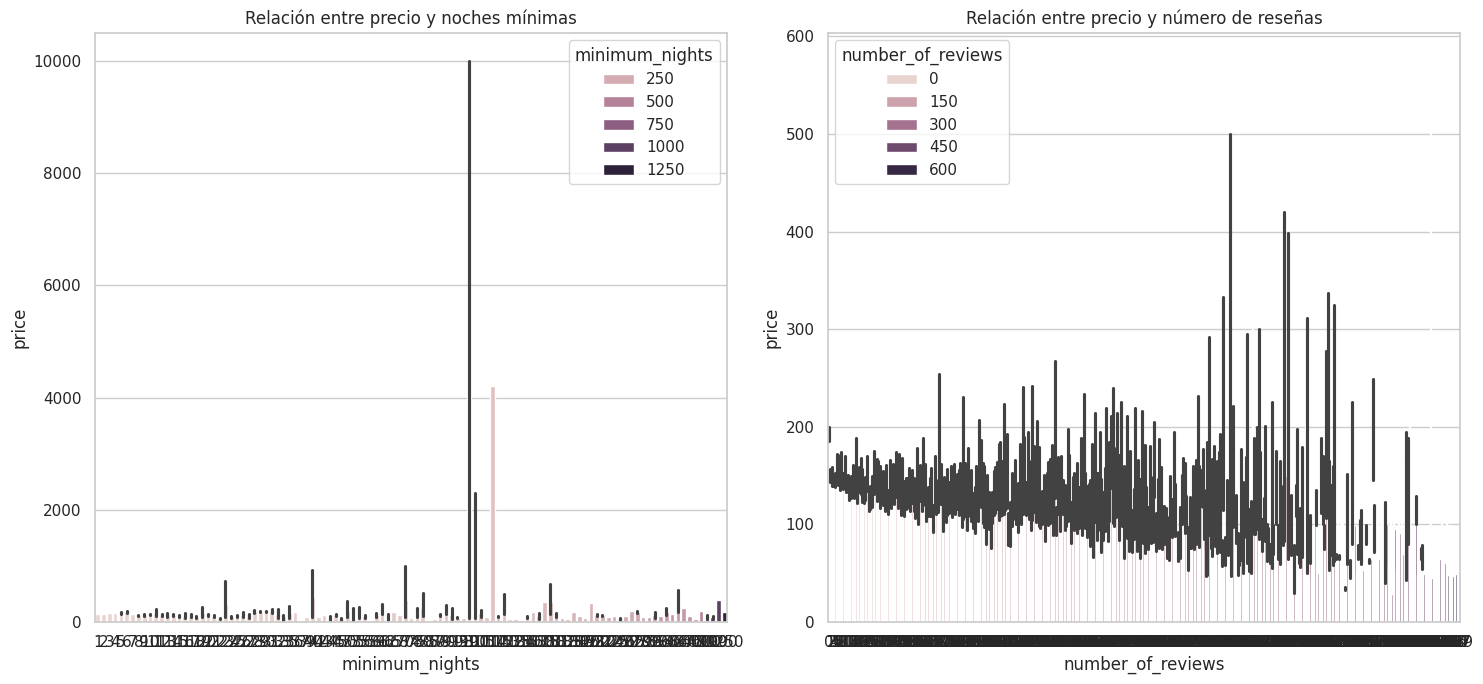

In [ ]:
fig, axis = plt.subplots(figsize=(15, 7), ncols=2)

sns.barplot(ax=axis[0], data=df, x="minimum_nights", y="price", hue="minimum_nights")
axis[0].set_title('Relación entre precio y noches mínimas')

sns.barplot(ax=axis[1], data=df, x="number_of_reviews", y="price", hue="number_of_reviews")
axis[1].set_title('Relación entre precio y número de reseñas')

plt.tight_layout()


plt.show()

In [ ]:
df[['price', 'calculated_host_listings_count']].corr()

price  calculated_host_listings_count
price                           1.000000                        0.057472
calculated_host_listings_count  0.057472                        1.000000

In [ ]:
df.groupby('calculated_host_listings_count')['price'].mean()

calculated_host_listings_count
1      158.677677
2      127.799790
3      122.193831
4      119.915972
5      120.501775
6      149.477193
7      104.378446
8      111.894231
9      118.320513
10     120.009524
11     453.581818
12     406.483333
13     150.876923
14     191.542857
15      94.813333
16     127.750000
17      88.485294
18     253.740741
19      88.789474
20     154.500000
21     158.095238
23     158.898551
25     147.500000
26      62.346154
27      47.888889
28     145.732143
29     121.965517
30     213.133333
31     159.354839
32      59.937500
33     201.838384
34      95.764706
37      35.945946
39     190.769231
43      48.139535
47     102.106383
49     484.112245
50     171.700000
52     126.134615
65     290.230769
87     215.436782
91     146.241758
96     210.994792
103     43.825243
121    277.528926
232    303.150862
327    253.195719
Name: price, dtype: float64

Numerical-Numerical Analysis

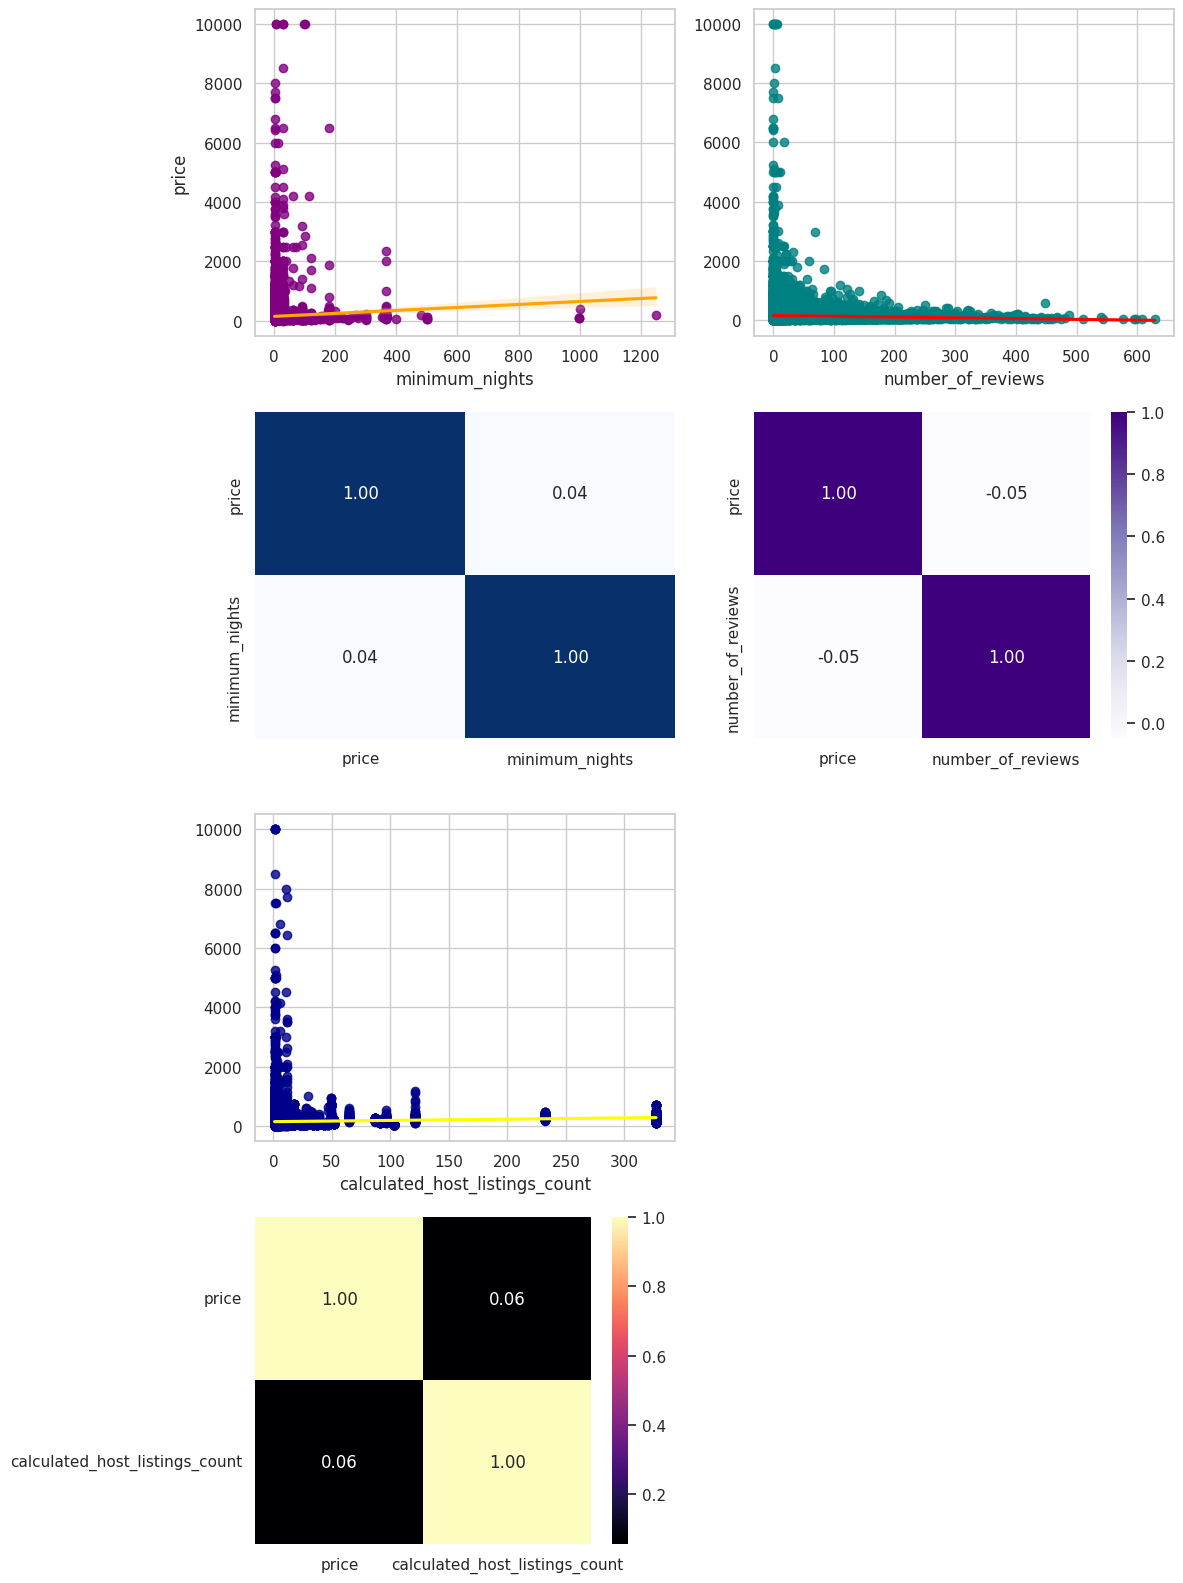

In [ ]:
fig, axis = plt.subplots(4, 2, figsize=(12, 16))

sns.regplot(ax=axis[0, 0], data=df, x="minimum_nights", y="price", scatter_kws={'color': 'purple'}, line_kws={'color': 'orange'})
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False, cmap="Blues")

sns.regplot(ax=axis[0, 1], data=df, x="number_of_reviews", y="price", scatter_kws={'color': 'teal'}, line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap="Purples")

sns.regplot(ax=axis[2, 0], data=df, x="calculated_host_listings_count", y="price", scatter_kws={'color': 'darkblue'}, line_kws={'color': 'yellow'}).set(ylabel=None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cmap="magma").set(ylabel=None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

Categorical-Categorical analysis

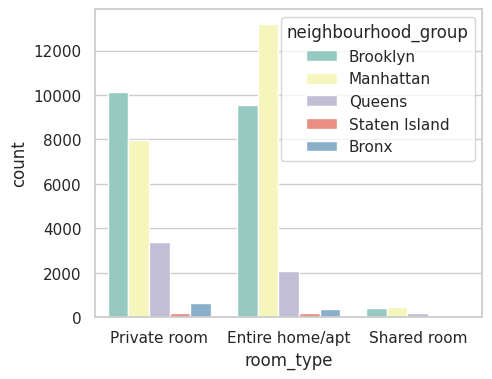

In [ ]:
fig, axis = plt.subplots(figsize=(5, 4))

sns.countplot(data=df, x="room_type", hue="neighbourhood_group", palette="Set3")

plt.show()

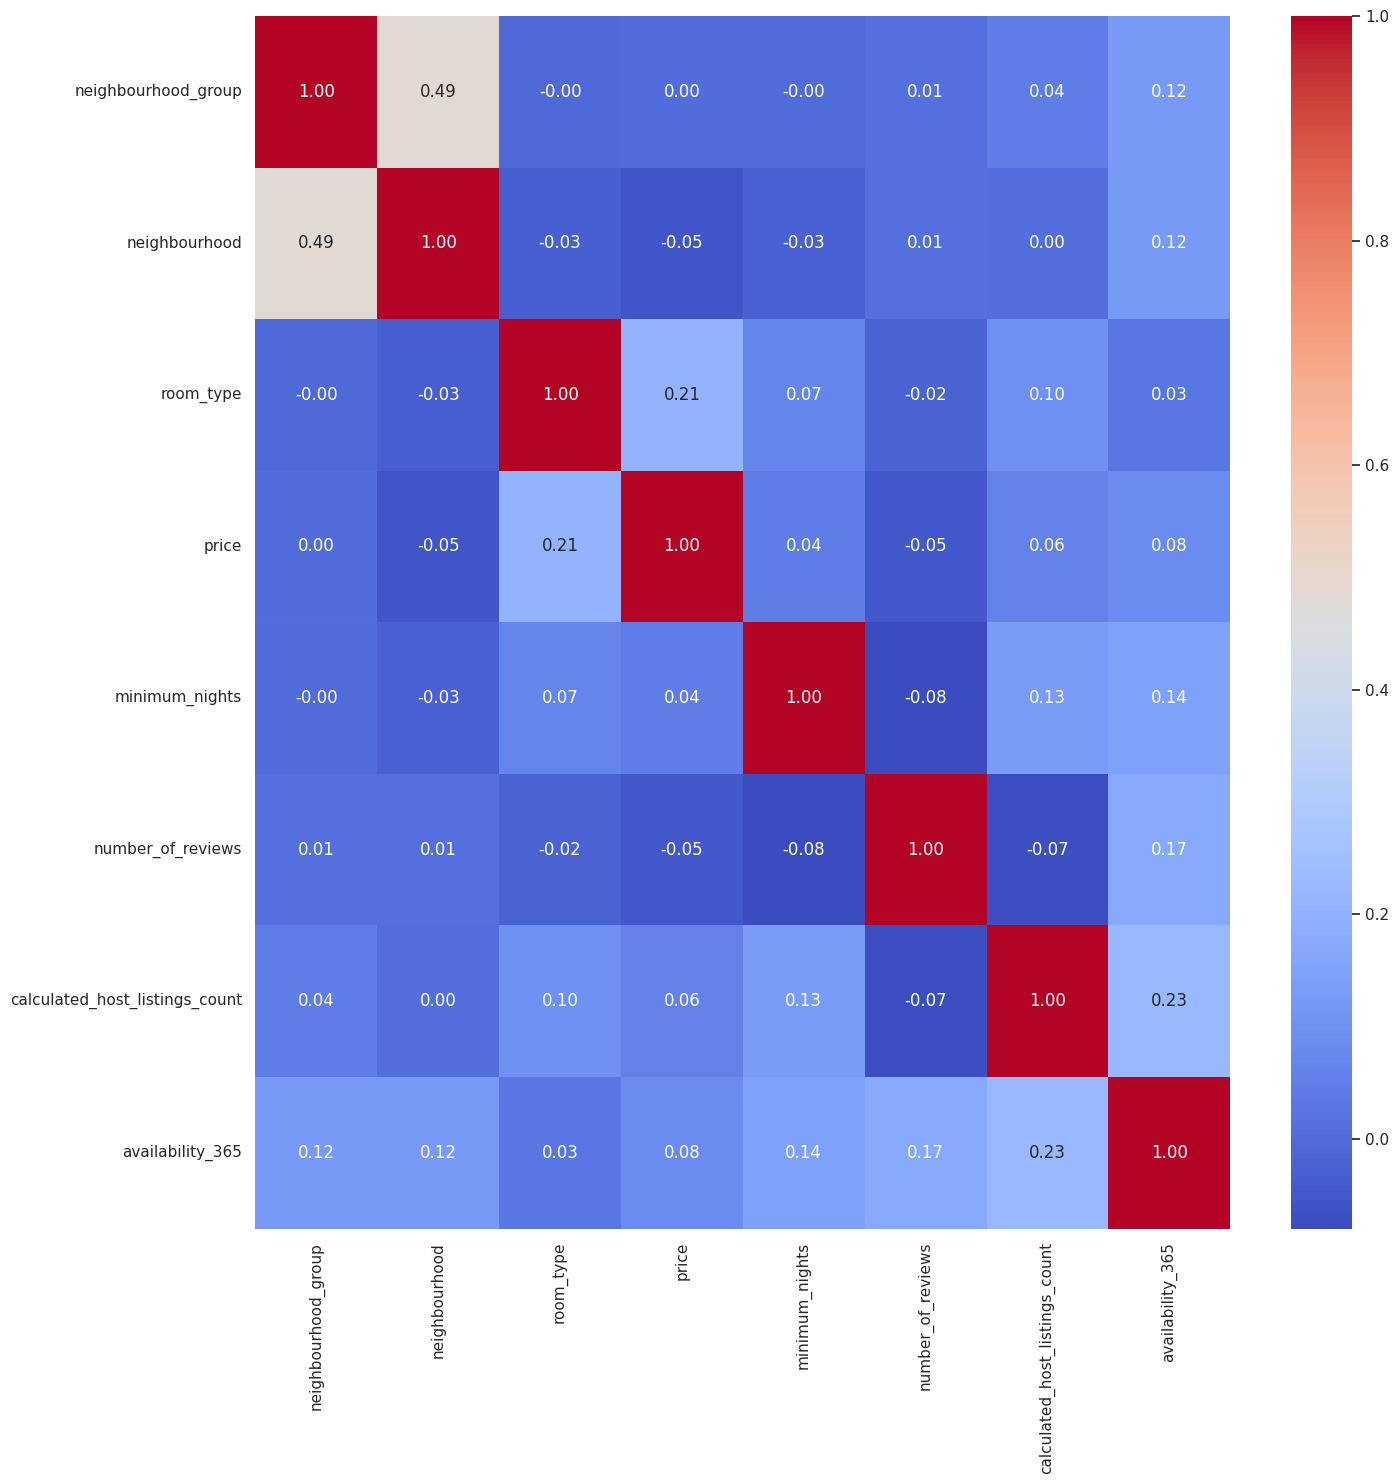

In [ ]:
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), 
            annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()
plt.show()

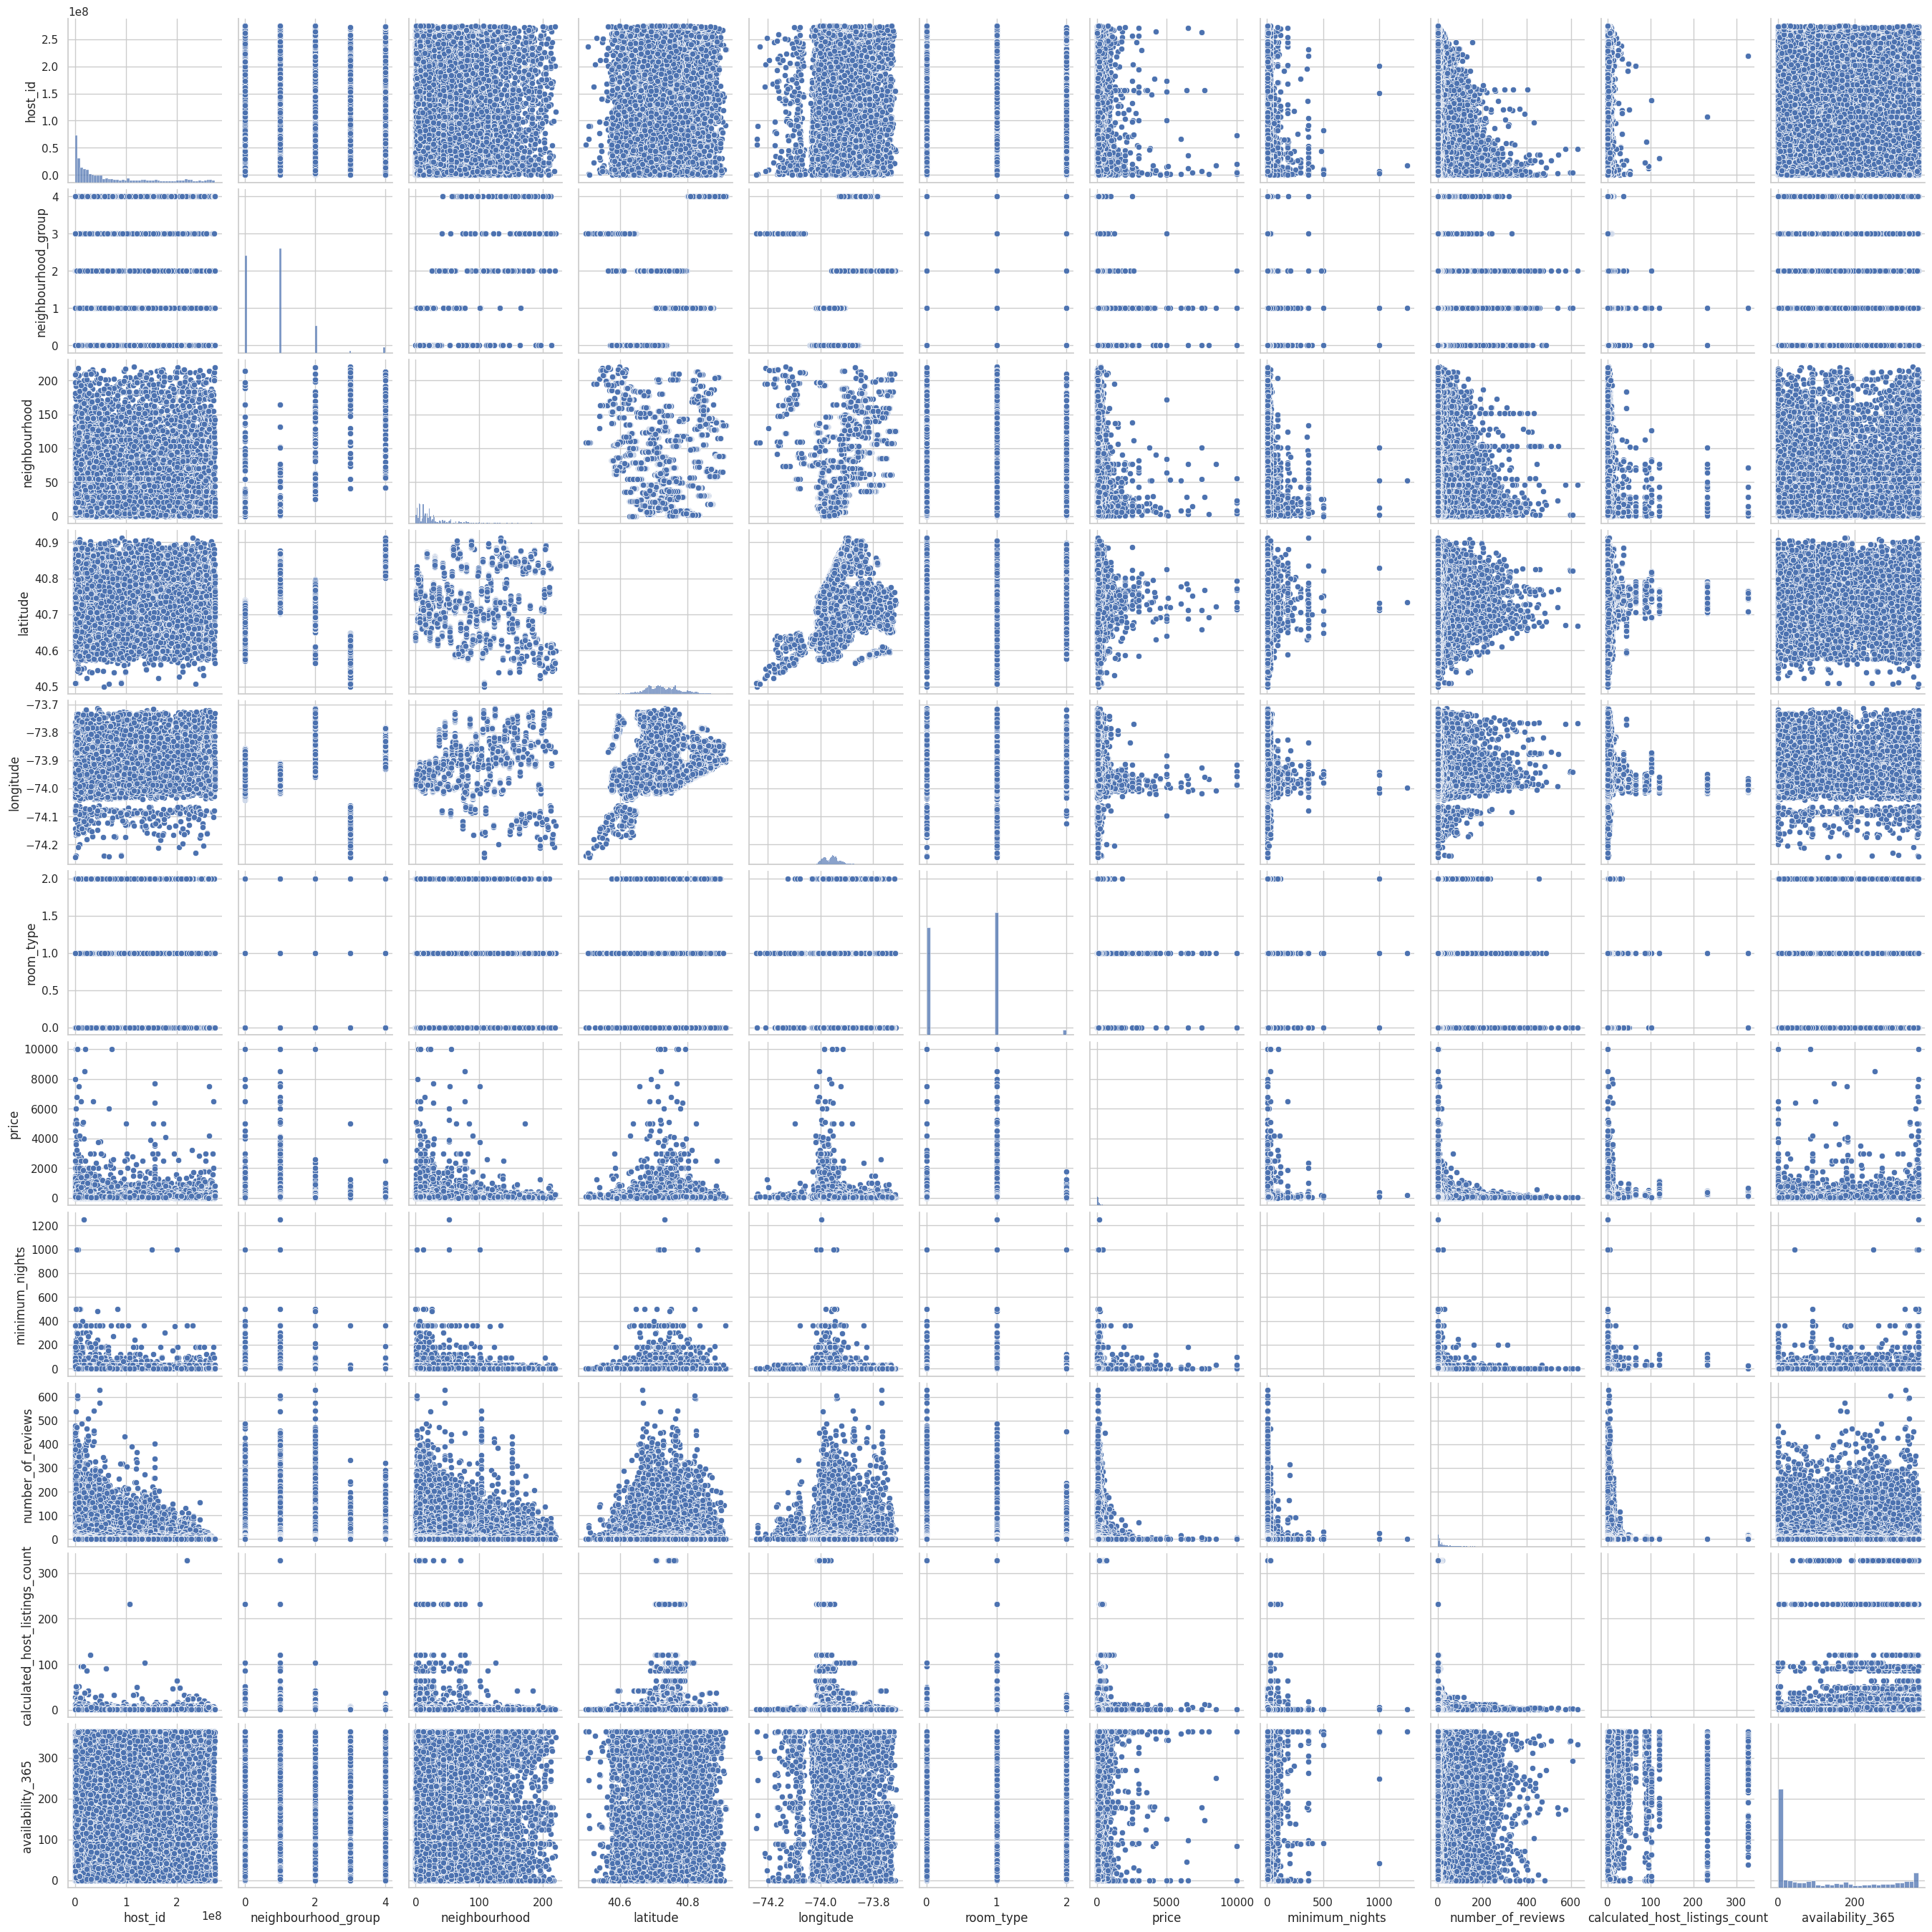

In [ ]:
sns.pairplot(data = df)

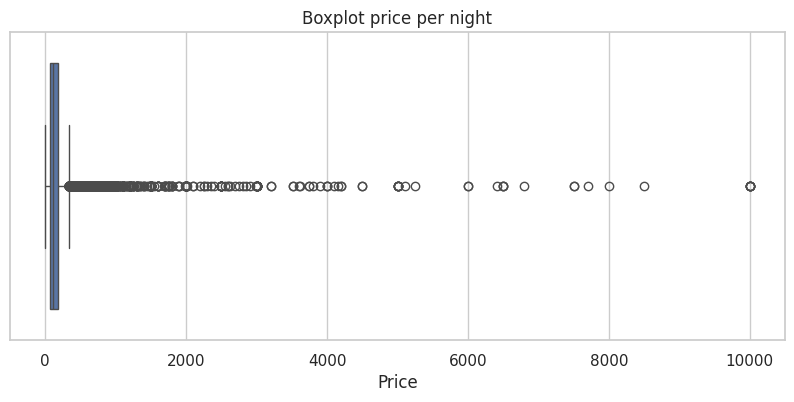

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["price"])
plt.title("Boxplot price per night")
plt.xlabel("Price")
plt.show()

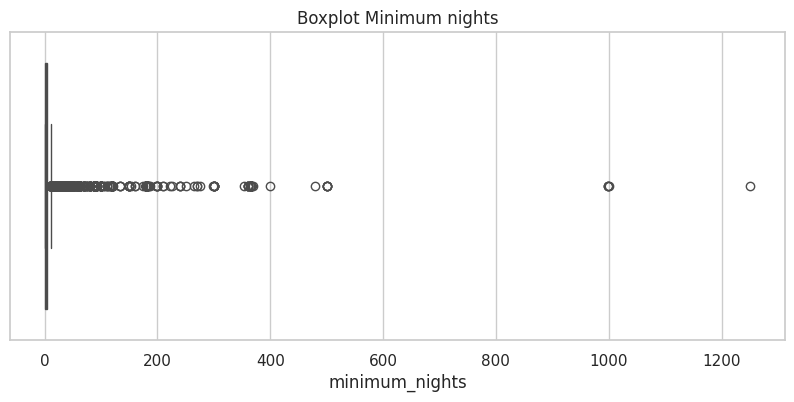

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["minimum_nights"])
plt.title("Boxplot Minimum nights")
plt.show()

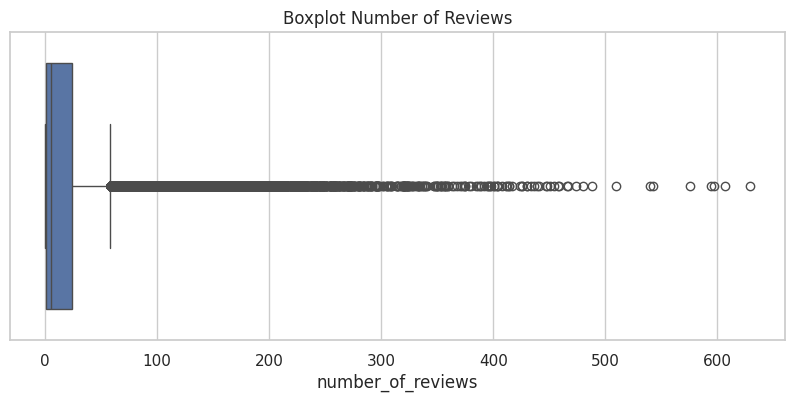

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["number_of_reviews"])
plt.title("Boxplot Number of Reviews")
plt.show()


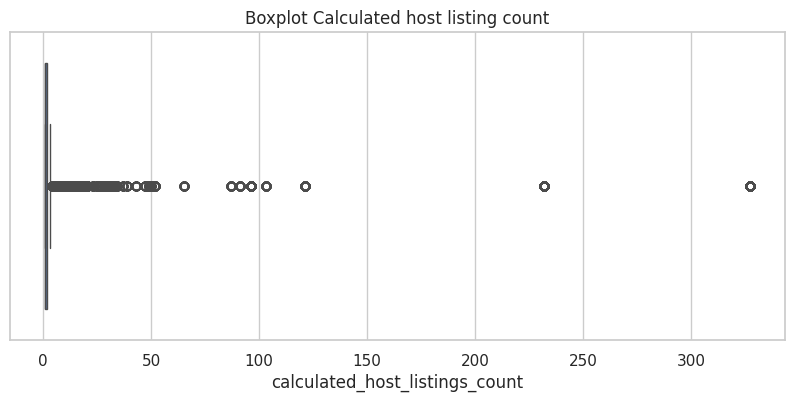

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["calculated_host_listings_count"])
plt.title("Boxplot Calculated host listing count")
plt.show()


Remove outliers using standar deviation method

In [ ]:
def remove_outliers_std(df, column, n_std=3):
    mean = df[column].mean()
    std = df[column].std()
    lower_limit = mean - n_std * std
    upper_limit = mean + n_std * std
    filtered_df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return filtered_df
columns_to_clean = ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]

filtered_df = df.copy()

for col in columns_to_clean:
    filtered_df = remove_outliers_std(filtered_df, col)
print("Original shape:", df.shape)
print("Filtered shape:", filtered_df.shape)



Original shape: (48895, 11)
Filtered shape: (46328, 11)


Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler


numeric_columns = ["price", "minimum_nights", "number_of_reviews", 
                   "calculated_host_listings_count", "availability_365"]

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(filtered_df[numeric_columns])

scaled_df = pd.DataFrame(scaled_features, columns=numeric_columns)

filtered_df[numeric_columns] = scaled_df

filtered_df.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0     2787                    0              0  40.64749  -73.97237   
1     2845                    1              1  40.75362  -73.98377   
2     4632                    1              2  40.80902  -73.94190   
4     7192                    1              4  40.79851  -73.94399   
5     7322                    1              5  40.74767  -73.97500   

   room_type     price  minimum_nights  number_of_reviews  \
0          0  0.173256         0.00000           0.057325   
1          1  0.261628         0.00000           0.286624   
2          0  0.174419         0.03125           0.000000   
4          1  0.232558         0.03125           0.471338   
5          1  0.069767         0.68750           0.312102   

   calculated_host_listings_count  availability_365  
0                        0.049020          1.000000  
1                        0.009804          0.972603  
2                        0.000000          1.000000  
4                        0.000000          0.353425  
5                        0.000000          0.000000

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy="mean")
df_imputed = imputer.fit_transform(scaled_df)

df_imputed = pd.DataFrame(df_imputed, columns=scaled_df.columns)

numeric_columns = ["price", "minimum_nights", "number_of_reviews", 
                   "calculated_host_listings_count", "availability_365"]

scaler = MinMaxScaler()
df_imputed[numeric_columns] = scaler.fit_transform(df_imputed[numeric_columns])


X = df_imputed.drop("price", axis = 1)
y = df_imputed["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)


selection_model.fit(X_train, y_train)


ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

minimum_nights  number_of_reviews  calculated_host_listings_count  \
0        0.015625           0.197452                        0.009804   
1        0.031250           0.146497                        0.000000   
2        0.078125           0.063694                        0.000000   
3        0.015625           0.006369                        0.000000   
4        0.031250           0.031847                        0.000000   

   availability_365  
0          0.728767  
1          0.484932  
2          0.438356  
3          0.000000  
4          0.000000

In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)